<h3>Analysing microclimate and soil interactions for urban sustainability</h3>

<p><strong>Authored by:</strong> Mahesh chirra</p>

<p><strong>Duration:</strong> 90 mins</p>

<p><strong>Level:</strong> Intermediate</p>

<p><strong>Pre-requisite Skills:</strong> Python</p>


<h2>Introduction</h2>

<p>The City of Melbourne’s Environmental Sustainability team is facing challenges from changing weather patterns that affect the city’s green spaces. To keep plants healthy, protect local wildlife, and make the city more comfortable for people, it’s important to understand how local weather affects the soil.</p>

<p>To help with this, the city has started a project that uses detailed weather data from microclimate sensors together with soil moisture readings from different urban and nearby areas. These datasets give valuable information about how temperature, humidity, and wind affect the soil’s ability to hold water, which is key for planning and caring for green spaces in a smart and sustainable way.</p>


<h2>Scenario</h2>

<p>
I want to analyse how microclimatic conditions such as temperature, humidity, and wind speed affect soil moisture trends across different locations, so that I can identify patterns that impact vegetation health and guide sustainable irrigation planning. Microclimate data reveals environmental stress factors, while soil moisture measurements show how these conditions translate into changes in soil water availability. This analysis helps detect periods of high evaporation risk, areas prone to soil dryness, and zones with stronger water retention capacity. The outcome will support evidence-based strategies for water use efficiency, targeted greening interventions, and improved climate resilience of public landscapes.
</p>

<p>
I want to evaluate climate–soil interactions using integrated sensor datasets, so that I can optimise maintenance schedules for green spaces and prioritise investment in climate-resilient plant species. By combining environmental monitoring with soil condition data, this analysis helps pinpoint critical intervention periods, reduce water wastage, and enhance urban cooling effects. It enables proactive decision-making that promotes sustainable green infrastructure, improves community well-being, and strengthens Melbourne’s capacity to adapt to future climate challenges.
</p>


<h2>Datasets</h2>

<h3>Dataset 1: Microclimate Sensors Dataset</h3>
<p>
The Microclimate Sensors Dataset contains detailed readings of environmental conditions such as temperature, humidity, wind speed, air pressure, and other weather-related parameters, collected from various urban and peri-urban locations in Melbourne. This data provides insights into local climate variations, enabling the identification of patterns that influence soil moisture and overall vegetation health. It is essential for understanding short-term weather changes and their effects on the urban ecosystem.
</p>

<h3>Dataset 2: Soil Sensors Dataset</h3>
<p>
The Soil Sensors Dataset records soil moisture levels, temperature, and other related properties from different monitoring sites across Melbourne. This dataset helps track how soil conditions respond to varying weather patterns, revealing periods of water scarcity or high evaporation risk. It supports better irrigation scheduling, soil management practices, and the selection of climate-resilient plant species for urban greening projects.
</p>


In [1]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id  = dataset_id
    format='csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit' : -1,
        'lang' : 'en',
        'timezone' : 'UTC'
    }

    response = requests.get(url,params=params)

    if response.status_code ==200:
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f"Request failed with status code: {response.status_code}")
# population_smallarea dataset
dataset_id_1 = "soil-sensor-readings-historical-data"
dataset_id_2 = "microclimate-sensors-data"

soil_sensors_data = collect_data(dataset_id_1)
microclimate_sensors_data = collect_data(dataset_id_2)

In [5]:
print(len(soil_sensors_data))
print(len(microclimate_sensors_data))

4124712
417796


In [7]:
microclimate_sensors_data.head()

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-06,2025-07-28T15:41:16+00:00,Tram Stop 7B - Melbourne Tennis Centre Precinc...,"-37.8194993, 144.9787211",0.0,278.0,359.0,0.0,1.0,3.8,9.6,78.2,1012.3,1.0,1.0,54.6
1,ICTMicroclimate-10,2025-07-28T16:21:11+00:00,1 Treasury Place,"-37.8128595, 144.9745395",262.0,310.0,353.0,0.1,0.9,1.1,8.5,93.8,1008.8,2.0,4.0,77.0
2,ICTMicroclimate-11,2025-07-28T16:05:10+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,352.0,359.0,0.1,1.8,4.4,9.3,79.5,1008.3,0.0,1.0,63.6
3,ICTMicroclimate-10,2025-08-02T21:29:31+00:00,1 Treasury Place,"-37.8128595, 144.9745395",309.0,328.0,347.0,0.4,1.0,1.6,3.7,99.7,1021.9,37.0,42.0,73.0
4,ICTMicroclimate-11,2025-08-02T21:58:33+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,348.0,357.0,0.0,0.7,2.5,4.9,87.2,1021.3,34.0,36.0,52.0


In [9]:
print(microclimate_sensors_data.info())
print(microclimate_sensors_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417796 entries, 0 to 417795
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   device_id             417796 non-null  object 
 1   received_at           417796 non-null  object 
 2   sensorlocation        411653 non-null  object 
 3   latlong               406313 non-null  object 
 4   minimumwinddirection  375645 non-null  float64
 5   averagewinddirection  417285 non-null  float64
 6   maximumwinddirection  375487 non-null  float64
 7   minimumwindspeed      375487 non-null  float64
 8   averagewindspeed      417285 non-null  float64
 9   gustwindspeed         375487 non-null  float64
 10  airtemperature        417285 non-null  float64
 11  relativehumidity      417285 non-null  float64
 12  atmosphericpressure   417285 non-null  float64
 13  pm25                  398153 non-null  float64
 14  pm10                  398153 non-null  float64
 15  

In [11]:
soil_sensors_data.head()

,local_time,site_name,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype
0,2024-12-28T11:30:00+00:00,Block 3,193880,25700703,2442672,#5 Temperature,19.74,ºC,Output
1,2024-12-28T15:00:36+00:00,Bourke South 6 (297),88425,25700944,1914088,Soil Temperature 20cm,21.76,ºC,Output
2,2024-12-28T15:00:40+00:00,Bourke South 6 (297),88425,25700977,1914097,Soil Salinity 20cm,0.59,µS/cm,Output
3,2024-12-28T15:00:00+00:00,Bourke South 6 (297),88425,25701058,1914083,Soil Moisture 60cm,26.43,%VWC,Output
4,2024-12-28T11:00:00+00:00,Bourke South 6 (297),88425,25701059,1914099,Soil Salinity 40cm,0.33,µS/cm,Output


In [13]:
print(soil_sensors_data.info())
print(soil_sensors_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124712 entries, 0 to 4124711
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   local_time        object 
 1   site_name         object 
 2   site_id           int64  
 3   id                int64  
 4   probe_id          int64  
 5   probe_measure     object 
 6   soil_value        float64
 7   unit              object 
 8   json_featuretype  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 283.2+ MB
None
local_time            0
site_name             0
site_id               0
id                    0
probe_id              0
probe_measure         0
soil_value          468
unit                  0
json_featuretype      0
dtype: int64


<h2>Data Cleaning</h2>

In [18]:
microclimate_sensors_data["timestamp"] = pd.to_datetime(
    microclimate_sensors_data["received_at"], errors="coerce", utc=True
)

In [20]:
microclimate_sensors_data = microclimate_sensors_data.dropna(subset=["timestamp"])

In [22]:
microclimate_sensors_data[["lat", "lon"]] = (
    microclimate_sensors_data["latlong"]
    .str.split(",", expand=True)
    .astype(float)
)

In [24]:
microclimate_sensors_data.head()

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise,timestamp,lat,lon
0,ICTMicroclimate-06,2025-07-28T15:41:16+00:00,Tram Stop 7B - Melbourne Tennis Centre Precinc...,"-37.8194993, 144.9787211",0.0,278.0,359.0,0.0,1.0,3.8,9.6,78.2,1012.3,1.0,1.0,54.6,2025-07-28 15:41:16+00:00,-37.819499,144.978721
1,ICTMicroclimate-10,2025-07-28T16:21:11+00:00,1 Treasury Place,"-37.8128595, 144.9745395",262.0,310.0,353.0,0.1,0.9,1.1,8.5,93.8,1008.8,2.0,4.0,77.0,2025-07-28 16:21:11+00:00,-37.812860,144.974539
2,ICTMicroclimate-11,2025-07-28T16:05:10+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,352.0,359.0,0.1,1.8,4.4,9.3,79.5,1008.3,0.0,1.0,63.6,2025-07-28 16:05:10+00:00,-37.812888,144.975086
3,ICTMicroclimate-10,2025-08-02T21:29:31+00:00,1 Treasury Place,"-37.8128595, 144.9745395",309.0,328.0,347.0,0.4,1.0,1.6,3.7,99.7,1021.9,37.0,42.0,73.0,2025-08-02 21:29:31+00:00,-37.812860,144.974539
4,ICTMicroclimate-11,2025-08-02T21:58:33+00:00,1 Treasury Place,"-37.812888, 144.9750857",0.0,348.0,357.0,0.0,0.7,2.5,4.9,87.2,1021.3,34.0,36.0,52.0,2025-08-02 21:58:33+00:00,-37.812888,144.975086


In [26]:
soil_sensors_data['timestamp'] = pd.to_datetime(
    soil_sensors_data['local_time'], errors='coerce', utc=True
)
soil_sensors_data = soil_sensors_data.dropna(subset=['timestamp'])

In [27]:
soil_sensors_data.head()

,local_time,site_name,site_id,id,probe_id,probe_measure,soil_value,unit,json_featuretype,timestamp
0,2024-12-28T11:30:00+00:00,Block 3,193880,25700703,2442672,#5 Temperature,19.74,ºC,Output,2024-12-28 11:30:00+00:00
1,2024-12-28T15:00:36+00:00,Bourke South 6 (297),88425,25700944,1914088,Soil Temperature 20cm,21.76,ºC,Output,2024-12-28 15:00:36+00:00
2,2024-12-28T15:00:40+00:00,Bourke South 6 (297),88425,25700977,1914097,Soil Salinity 20cm,0.59,µS/cm,Output,2024-12-28 15:00:40+00:00
3,2024-12-28T15:00:00+00:00,Bourke South 6 (297),88425,25701058,1914083,Soil Moisture 60cm,26.43,%VWC,Output,2024-12-28 15:00:00+00:00
4,2024-12-28T11:00:00+00:00,Bourke South 6 (297),88425,25701059,1914099,Soil Salinity 40cm,0.33,µS/cm,Output,2024-12-28 11:00:00+00:00


In [37]:
for col in ["airtemperature", "relativehumidity", "atmosphericpressure"]:
    if col in microclimate_sensors_data.columns:
        microclimate_sensors_data[col] = pd.to_numeric(microclimate_sensors_data[col], errors="coerce")
        microclimate_sensors_data[col].fillna(microclimate_sensors_data[col].mean(), inplace=True)

C:\Users\maddi\AppData\Local\Temp\ipykernel_89828\2258117913.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  microclimate_sensors_data[col].fillna(microclimate_sensors_data[col].mean(), inplace=True)


In [39]:
if "Soil_Value" in soil_sensors_data.columns:
    soil_sensors_data["Soil_Value"] = pd.to_numeric(soil_sensors_data["Soil_Value"], errors="coerce")
    soil_sensors_data["Soil_Value"].fillna(soil_sensors_data["Soil_Value"].median(), inplace=True)

In [41]:
microclimate_sensors_data.drop_duplicates(inplace=True)
soil_sensors_data.drop_duplicates(inplace=True)

In [52]:
print("Microclimate Data:")
print(microclimate_sensors_data.info())
print("\nSoil Sensor Data:")
print(soil_sensors_data.info())


Microclimate Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417796 entries, 0 to 417795
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   device_id             417796 non-null  object             
 1   received_at           417796 non-null  object             
 2   sensorlocation        411653 non-null  object             
 3   latlong               406313 non-null  object             
 4   minimumwinddirection  375645 non-null  float64            
 5   averagewinddirection  417285 non-null  float64            
 6   maximumwinddirection  375487 non-null  float64            
 7   minimumwindspeed      375487 non-null  float64            
 8   averagewindspeed      417285 non-null  float64            
 9   gustwindspeed         375487 non-null  float64            
 10  airtemperature        417796 non-null  float64            
 11  relativehumidity      417796 non-

<h1>Data Visualizations</h1>

<h3>Air Temperature and Humidity Over Time</h3>
<p>This time series plot displays the variation in air temperature (in red) and relative humidity (in blue) over time. The temperature values remain mostly below 30°C, while humidity fluctuates widely between 40% and 100%. This visualization helps identify seasonal and daily environmental shifts. Notably, dips in humidity may signal periods of high evaporation risk, which are critical for irrigation planning and vegetation care.</p>


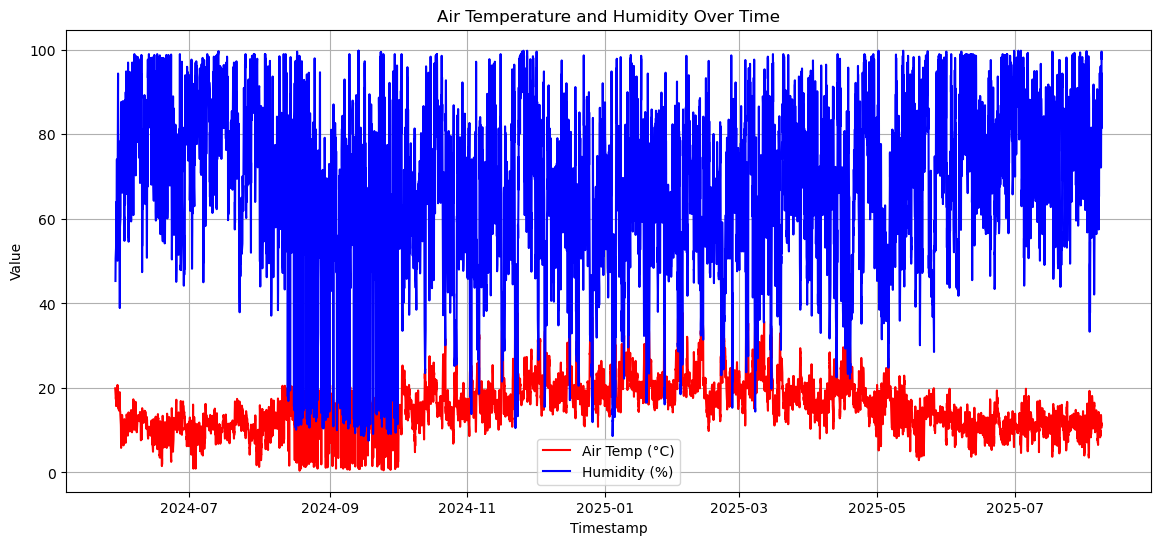

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

microclimate_sensors_data['timestamp'] = pd.to_datetime(microclimate_sensors_data['timestamp'])

plt.figure(figsize=(14, 6))
sns.lineplot(x='timestamp', y='airtemperature', data=microclimate_sensors_data.sample(10000), label='Air Temp (°C)', color='red')
sns.lineplot(x='timestamp', y='relativehumidity', data=microclimate_sensors_data.sample(10000), label='Humidity (%)', color='blue')
plt.title('Air Temperature and Humidity Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


<h3>Soil Moisture Over Time - Site: Royal Parade CSIRO</h3>
<p>This plot illustrates soil moisture trends recorded at the Royal Parade CSIRO site. The data shows fluctuating moisture levels, with periods of sharp decline, likely due to dry weather or high evaporation. Peaks represent well-watered or rainy periods. Understanding these trends is essential for scheduling irrigation, identifying drought-prone months, and improving plant health through data-driven soil management.</p>


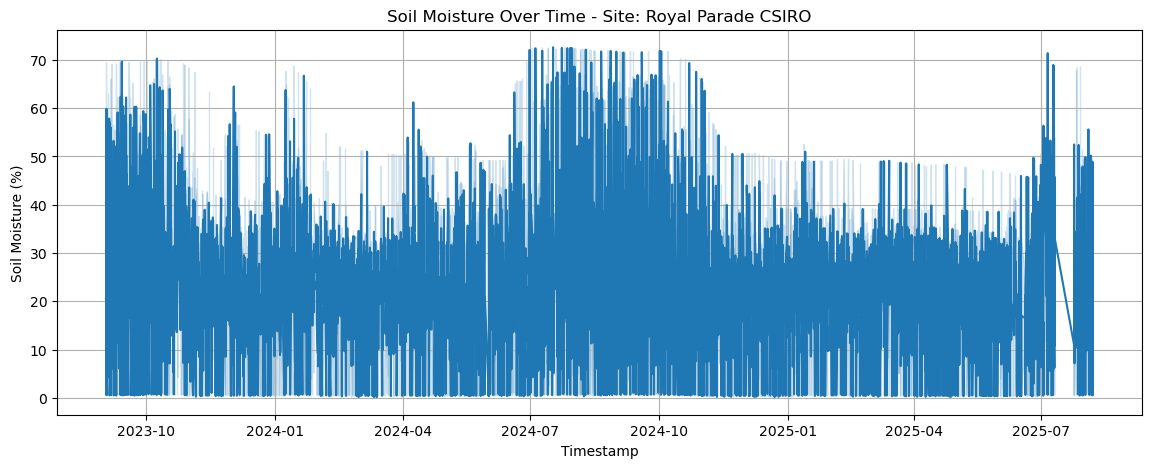

In [63]:
# Ensure datetime type
soil_sensors_data['timestamp'] = pd.to_datetime(soil_sensors_data['timestamp'])

top_site = soil_sensors_data['site_name'].value_counts().index[0]

plt.figure(figsize=(14, 5))
sns.lineplot(data=soil_sensors_data[soil_sensors_data['site_name'] == top_site].sample(10000),
             x='timestamp', y='soil_value')
plt.title(f"Soil Moisture Over Time - Site: {top_site}")
plt.xlabel("Timestamp")
plt.ylabel("Soil Moisture (%)")
plt.grid(True)
plt.show()


<h3>Microclimate Sensor Locations in Melbourne</h3>
<p>The scatter plot maps the geographic distribution of microclimate sensors based on latitude and longitude. Each point represents a sensor's physical location across Melbourne. This spatial overview confirms coverage of various urban zones and enables location-based analysis of environmental conditions such as temperature, humidity, and air quality, which can be correlated with local vegetation and soil responses.</p>


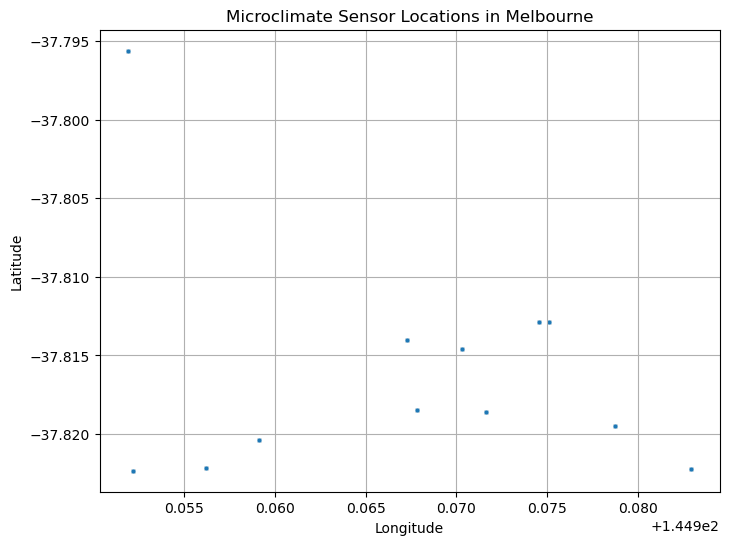

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=microclimate_sensors_data.dropna(subset=['lat', 'lon']), x='lon', y='lat', alpha=0.5, s=10)
plt.title("Microclimate Sensor Locations in Melbourne")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


<h3>Air Temperature by Hour of Day</h3>
<p>This boxplot displays how air temperature varies throughout the day, aggregated by hour. Higher temperatures are observed between 12 PM and 4 PM, peaking around midday, while cooler temperatures occur early in the morning and late at night. This diurnal pattern is important for determining optimal watering schedules and identifying stress periods for plants and urban green spaces.</p>


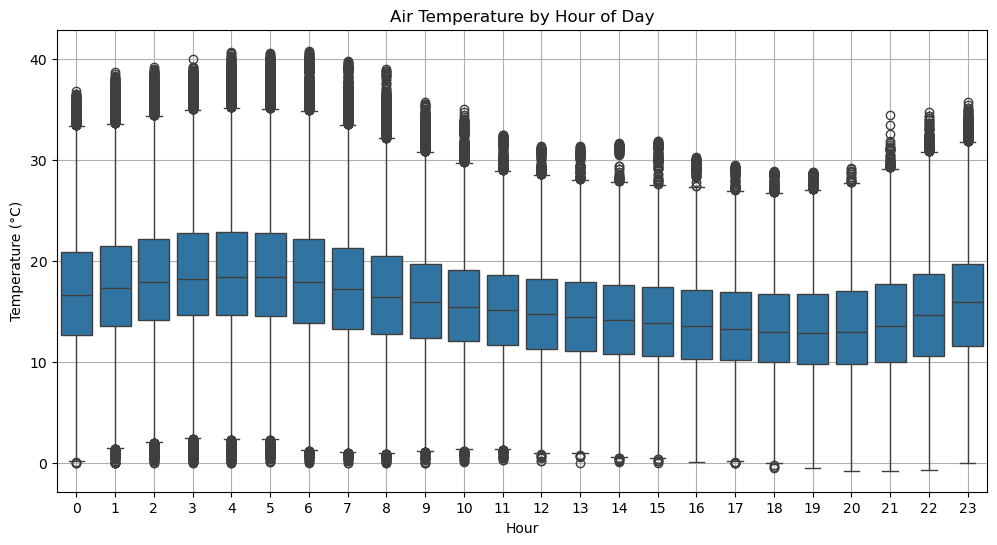

In [67]:
microclimate_sensors_data['hour'] = microclimate_sensors_data['timestamp'].dt.hour

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='airtemperature', data=microclimate_sensors_data)
plt.title("Air Temperature by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


<h3>Microclimate Sensor Correlation Matrix</h3>
<p>The heatmap shows the correlation coefficients between various microclimate variables. Notable insights include:</p>
<ul>
  <li><strong>Air temperature</strong> is negatively correlated with <strong>relative humidity</strong> (−0.49), which is expected as warmer air holds more moisture.</li>
  <li><strong>Atmospheric pressure</strong> shows strong inverse correlation with both <strong>PM2.5</strong> and <strong>minimum wind speed</strong>, possibly indicating weather pattern effects on pollution dispersion.</li>
  <li><strong>PM2.5</strong> and <strong>noise</strong> are positively correlated, suggesting urban activity patterns might influence both simultaneously.</li>
</ul>
<p>This matrix helps identify relationships that can inform predictive models and environmental planning.</p>


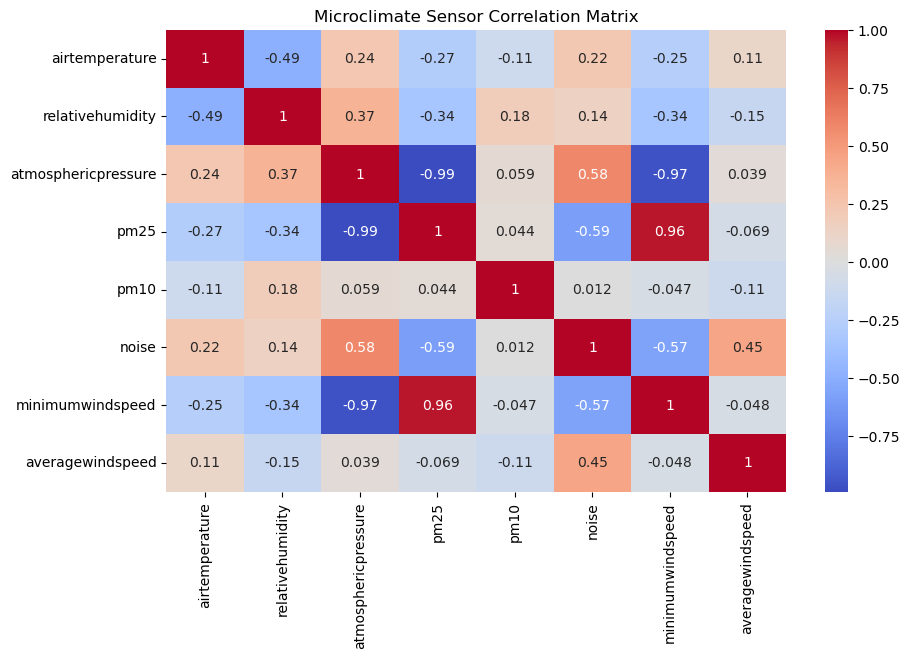

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns that exist
columns_to_plot = [
    'airtemperature',
    'relativehumidity',
    'atmosphericpressure',
    'pm25',
    'pm10',
    'noise',
    'minimumwindspeed',
    'averagewindspeed'
]

# Drop rows with missing values in selected columns
corr_df = microclimate_sensors_data[columns_to_plot].dropna()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Microclimate Sensor Correlation Matrix")
plt.show()
